# Capstone Project

# Analyzing and Predicting the Trends of Covid19 in India

# Data Processing and Analysis

*Importing the necessary libraries*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
data = pd.read_csv("complete.csv")

In [4]:
data.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 9 columns):
Date                                          1365 non-null object
Name of State / UT                            1365 non-null object
Total Confirmed cases (Indian National)       1365 non-null int64
Total Confirmed cases ( Foreign National )    1365 non-null int64
Cured/Discharged/Migrated                     1365 non-null int64
Latitude                                      1365 non-null float64
Longitude                                     1365 non-null float64
Death                                         1365 non-null int64
Total Confirmed cases                         1365 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 96.1+ KB


*There are no null values, and the data is clean*

## Feature generation and selection

The dtype of <code>Date</code> is <code>object</code>. Thus, changing it to the <code>date</code> datatype would give us the option to extract more data from the attribute.

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 9 columns):
Date                                          1365 non-null datetime64[ns]
Name of State / UT                            1365 non-null object
Total Confirmed cases (Indian National)       1365 non-null int64
Total Confirmed cases ( Foreign National )    1365 non-null int64
Cured/Discharged/Migrated                     1365 non-null int64
Latitude                                      1365 non-null float64
Longitude                                     1365 non-null float64
Death                                         1365 non-null int64
Total Confirmed cases                         1365 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 96.1+ KB


Extracting cases per month

In [9]:
data.drop(columns = ['Total Confirmed cases (Indian National)', 'Total Confirmed cases ( Foreign National )'], inplace = True)

In [10]:
data.head()

,Date,Name of State / UT,Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,0,10.8505,76.2711,0,3


In [11]:
data.columns = ['Date', 'State', 'Recovered', 'Lat', 'Long', 'Deaths', 'Confirmed']

In [12]:
data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths']

In [13]:
data.head()

,Date,State,Recovered,Lat,Long,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,10.8505,76.2711,0,1,1
1,2020-01-31,Kerala,0,10.8505,76.2711,0,1,1
2,2020-02-01,Kerala,0,10.8505,76.2711,0,2,2
3,2020-02-02,Kerala,0,10.8505,76.2711,0,3,3
4,2020-02-03,Kerala,0,10.8505,76.2711,0,3,3


## Cases till date

In [14]:
till_date = data[data['Date'] == max(data['Date'])]
till_date.sort_values('Active', ascending = False, inplace = True)

In [15]:
till_date.head()

,Date,State,Recovered,Lat,Long,Deaths,Confirmed,Active
1333,2020-04-27,Andaman and Nicobar Islands,11,11.7401,92.6586,0,33,22
1334,2020-04-27,Andhra Pradesh,231,15.9129,79.7400,31,1097,835
1335,2020-04-27,Arunachal Pradesh,1,28.2180,94.7278,0,1,0
1336,2020-04-27,Assam,27,26.2006,92.9376,1,36,8
1337,2020-04-27,Bihar,56,25.0961,85.3131,2,274,216


In [186]:
import folium
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4, tiles="Stamen Terrain")

for lat, lon,state,Confirmed,Recovered,Deaths,Active in zip(till_date['Lat'], till_date['Long'],till_date['State'],till_date['Confirmed'],till_date['Recovered'],till_date['Deaths'],till_date['Active']):
    folium.CircleMarker([lat, lon],
                        radius= 2 + np.log(Active)*2,
                        color = 'red',
                        popup =(
                        'State: ' + str(state) + '<br>'
                        'Active: ' + str(Active) + '<br>'
                        'Confirmed: ' + str(Confirmed) + '<br>'
                        'Recovered: ' + str(Recovered) + '<br>'
                        'Deaths: ' + str(Deaths) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.05 ).add_to(map)
map

C:\Users\Ritika\.conda\envs\usual\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


# Cases time line Visualization

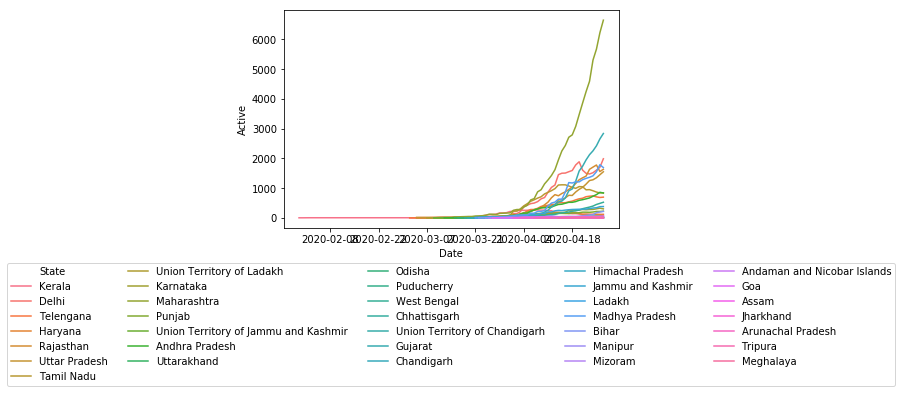

In [213]:
sns.lineplot(x = 'Date', y = 'Active', data = data, hue='State')
plt.legend(loc = 'lower center', ncol = 5, bbox_to_anchor = (0.5,-0.75))

# EDA for Maharashtra, India

#### Focusing on state of Maharashtra as it has the highest number of cases

In [80]:
maha = data[data['State'] == 'Maharashtra']

In [81]:
maha.head()

,Date,State,Recovered,Lat,Long,Deaths,Confirmed,Active
76,2020-03-09,Maharashtra,0,19.7515,75.7139,0,2,2
88,2020-03-10,Maharashtra,0,19.7515,75.7139,0,5,5
100,2020-03-11,Maharashtra,0,19.7515,75.7139,0,10,10
113,2020-03-12,Maharashtra,0,19.7515,75.7139,0,11,11
126,2020-03-13,Maharashtra,0,19.7515,75.7139,0,11,11


In [82]:
maha.shape

(50, 8)

In [83]:
print("The first case of COVID19 was seen on {}. Till date {}, the cases went up to {}".\
      format(str(min(maha['Date']).date()), str(max(maha['Date']).date()), int(maha['Active'][maha['Date'] == max(maha['Date'])])))

The first case of COVID19 was seen on 2020-03-09. Till date 2020-04-27, the cases went up to 6650


In [84]:
maha_lat = maha['Lat'][76]
maha_lang = maha['Long'][76]
maha.drop(columns = ['State','Lat', 'Long'], axis = 1, inplace=True)
maha.reset_index(drop=True,inplace = True)

In [85]:
maha.head()

,Date,Recovered,Deaths,Confirmed,Active
0,2020-03-09,0,0,2,2
1,2020-03-10,0,0,5,5
2,2020-03-11,0,0,10,10
3,2020-03-12,0,0,11,11
4,2020-03-13,0,0,11,11


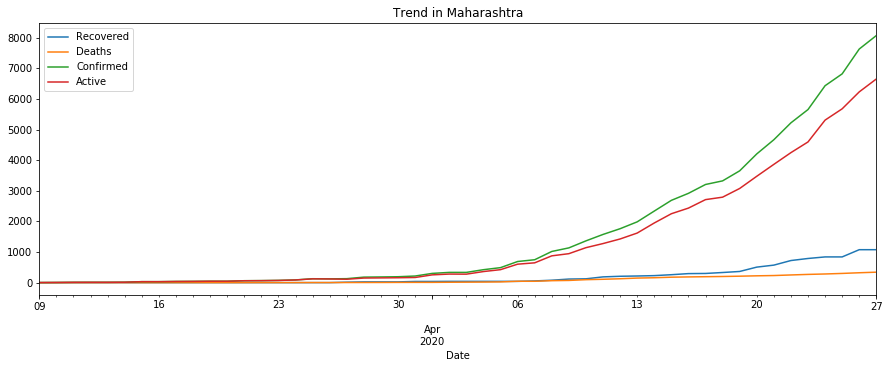

In [118]:
maha.plot(kind = 'line', x = 'Date', title = "Trend in Maharashtra", figsize = (15,5), fontsize = 10)

In [131]:
maha['days'] = [i for i in range(1, maha.shape[0]+1)]

C:\Users\Ritika\.conda\envs\usual\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
maha.head()

,Date,Recovered,Deaths,Confirmed,Active,days
0,2020-03-09,0,0,2,2,1
1,2020-03-10,0,0,5,5,2
2,2020-03-11,0,0,10,10,3
3,2020-03-12,0,0,11,11,4
4,2020-03-13,0,0,11,11,5


In [144]:
def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y

In [158]:
popt, pcov = curve_fit(sigmoid, maha['days'], maha['Active'], method='dogbox')

In [161]:
x = np.linspace(0, 100)
y = sigmoid(x, *popt)

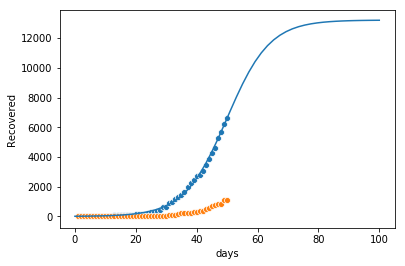

In [162]:
sns.scatterplot(x = 'days', y = 'Active', data = maha)
sns.scatterplot(x = 'days', y = 'Recovered', data = maha)
sns.lineplot(x = x, y = y)

**Here, we can see that the sigmoidal curve flattens at around day 75 for Maharashtra**

## India's Cumulative data

In [93]:
india = data.groupby(data['Date'].dt.date).sum()
india.drop(columns = ['Lat', 'Long'], inplace = True)

In [99]:
india.reset_index(inplace = True)

In [164]:
india['days'] = [i for i in range(1, india.shape[0]+1)]

In [165]:
india.head()

,Date,Recovered,Deaths,Confirmed,Active,days
0,2020-01-30,0,0,1,1,1
1,2020-01-31,0,0,1,1,2
2,2020-02-01,0,0,2,2,3
3,2020-02-02,0,0,3,3,4
4,2020-02-03,0,0,3,3,5


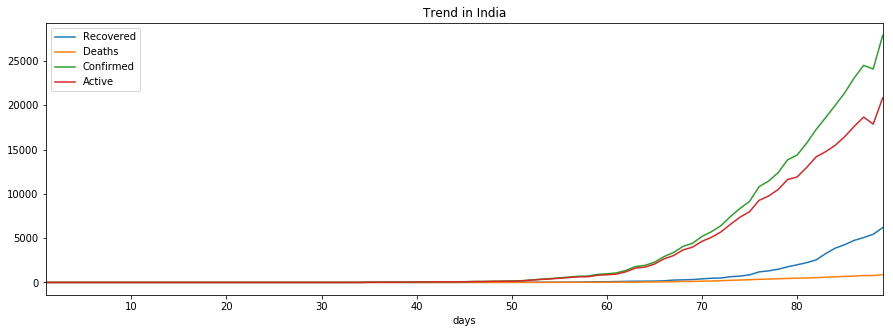

In [166]:
india.plot(kind = 'line', x = 'days', title = "Trend in India", figsize = (15,5), fontsize = 10)

In [180]:
population=1.332*10**9
popt_ind, pcov_ind = curve_fit(sigmoid, india['days'], india['Active'])

In [183]:
x_ind = np.linspace(0, 120)
y_ind = sigmoid(x_ind, *popt_ind)

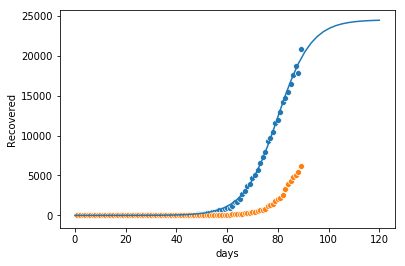

In [184]:
sns.scatterplot(x = 'days', y = 'Active', data = india)
sns.scatterplot(x = 'days', y = 'Recovered', data = india)
sns.lineplot(x = x_ind, y = y_ind)

**Here, we can see that the sigmoidal curve flattens at around day 115 for India**